In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.applications.xception import Xception,preprocess_input
import tensorflow as tf
from keras.preprocessing import image
from keras.layers import Input
from keras.backend import reshape
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
images_dir = '../input/h-and-m-personalized-fashion-recommendations/images'

In [3]:
def getImagePaths(path):
#combine file name and image name to fetch images in future
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

def preprocess_img(img_path):
    dsize = (225,225)
    new_image=cv2.imread(img_path)
    new_image=cv2.resize(new_image,dsize,interpolation=cv2.INTER_NEAREST)  
    new_image=np.expand_dims(new_image,axis=0)
    new_image=preprocess_input(new_image)
    return new_image

def load_data():
    output=[]
    output=getImagePaths(images_dir)[:10000]
    return output

In [4]:
 [i for i in os.walk(images_dir)]

[('../input/h-and-m-personalized-fashion-recommendations/images',
  ['057',
   '086',
   '061',
   '048',
   '053',
   '051',
   '095',
   '018',
   '044',
   '016',
   '012',
   '029',
   '025',
   '078',
   '056',
   '042',
   '082',
   '055',
   '076',
   '091',
   '094',
   '027',
   '080',
   '041',
   '036',
   '070',
   '071',
   '035',
   '026',
   '065',
   '062',
   '084',
   '034',
   '058',
   '060',
   '068',
   '075',
   '033',
   '049',
   '023',
   '020',
   '013',
   '050',
   '052',
   '073',
   '066',
   '067',
   '022',
   '043',
   '054',
   '081',
   '047',
   '011',
   '087',
   '072',
   '021',
   '015',
   '059',
   '014',
   '039',
   '040',
   '090',
   '064',
   '063',
   '031',
   '092',
   '017',
   '083',
   '019',
   '024',
   '069',
   '093',
   '089',
   '037',
   '046',
   '045',
   '010',
   '088',
   '077',
   '028',
   '038',
   '074',
   '079',
   '032',
   '030',
   '085'],
  []),
 ('../input/h-and-m-personalized-fashion-recommendations/images/05

In [5]:
def model():
    #pretrained model Xception
    model=Xception(weights='imagenet',include_top=False)
    for layer in model.layers:
        layer.trainable=False
    return model

def feature_extraction(image_data,model):
    features=model.predict(image_data)
    features=np.array(features)
    features=features.flatten()
    return features

In [16]:
def result_vector_cosine(model,feature_vector,new_img):
    new_feature = model.predict(new_img)
    new_feature = np.array(new_feature)
    new_feature = new_feature.flatten()
    N_result = 12
    nbrs = NearestNeighbors(n_neighbors=N_result, metric="cosine").fit(feature_vector)
    distances, indices = nbrs.kneighbors([new_feature])
    return(indices)

In [6]:
def input_show(data):
    plt.title("Query Image")
    plt.imshow(data)


In [7]:
  def show_result(data,result):
    fig = plt.figure(figsize=(12,8))
    for i in range(0,12):
        index_result=result[0][i]
        plt.subplot(3,4,i+1)
        plt.imshow(cv2.imread(data[index_result]))
    plt.show()

1/1 [==============================] - 0s 149ms/step


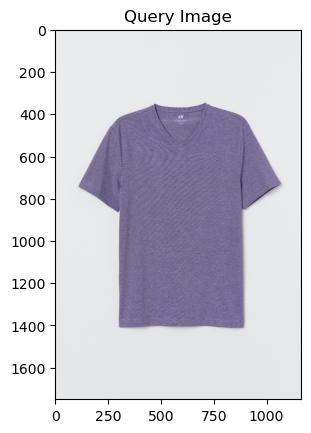

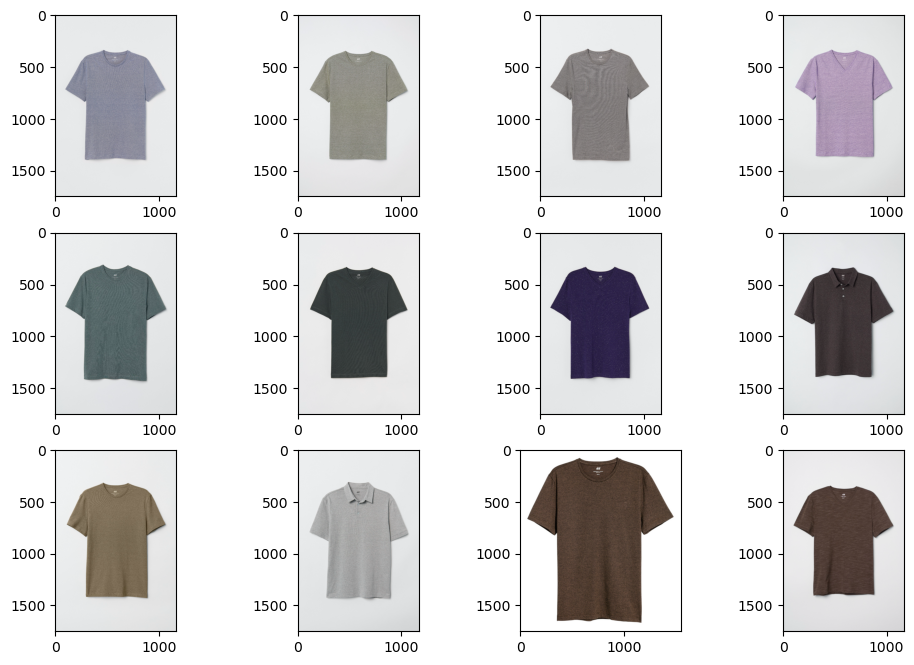

In [23]:
features=[]
output=load_data()
main_model=model()
for i in output[:999]:
    new_img=preprocess_img(i)
    features.append(feature_extraction(new_img,main_model))
feature_vec = np.array(features)
result=result_vector_cosine(main_model,feature_vec,preprocess_img(output[1000]))
input_show(cv2.imread(output[1000]))
show_result(output,result)

1/1 [==============================] - 0s 154ms/step


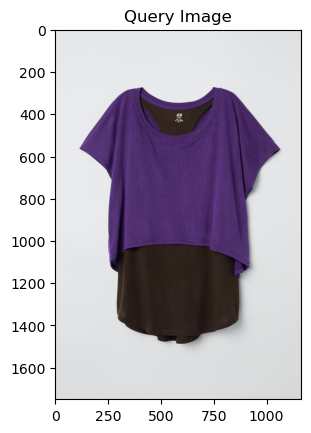

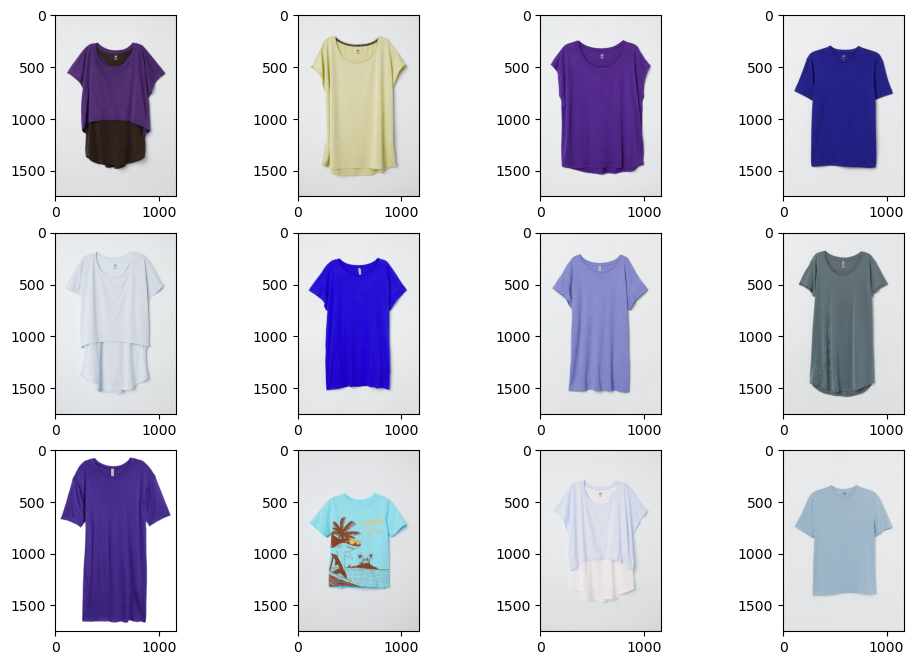

In [31]:
result=result_vector_cosine(main_model,feature_vec,preprocess_img(output[100]))
input_show(cv2.imread(output[100]))
show_result(output,result)